# Waves Series Examples


A set of waves series generation methods are presented in this example

## Table of Contents

* [1. Boundary conditions description](#1.)
* [2. Sea states generation](#2.)
	* [2.1. Monochromatic waves](#2.1.)
	* [2.2. Bichromatic waves](#2.2.)
	* [2.3. JONSWAP spectrum](#2.3.)


In [1]:
# import python libs
import sys
import os
import os.path as op

# dev
sys.path.insert(0, op.join(os.getcwd(),'..'))

# swash wrap module
from wswash.wrap import SwashProject
from wswash.plots import SwashPlot
from wswash.waves import series_Jonswap, series_regular_monochromatic, series_regular_bichromatic


In [2]:
# instance swash plot module
sp = SwashProject('', '')
sm = SwashPlot(sp)


## 1. Boundary conditions description <a name="1."></a>

<p style="font-family: times, Times New Roman; font-size:12pt; color:black;">
    The boundaries of the computational grid in SWASH are either land, beach or water. The wave condition is imposed on the west boundary of the computational domain, so that the wave propagation is pointing eastward. To simulate entering waves without some reflections at the wavemaker boundary, a weakly-reflective boundary condition allowing outgoing waves is adopted. For this test case, a time series synthesized from parametric information (wave height, period, etc.) will be given as wavemaker. This may either be defined as regular waves or irregular unidirectional waves by means of 1D spectrum. Both the initial water level and velocity components are set to zero.
</p>

## 2. Sea states generation <a name="2."></a>


* `tendc`  <span style="font-family: times, Times New Roman; font-size:12pt; color:black;"> : duration of the simulation. The simulation will be long enough to get a steady-state solution. For a suitable simulation time at least 500 to 1000 waves are needed to reach stationary conditions. This time window does not include the spin-up time. It is assumed that the warm up takes at most 15% of the total time of the simulation ($ 0.15 · sp.tendc $). 

In [3]:
# simulation duration parameters

tendc = 1800           # simulation period (s)
warmup = 0.15 * tendc  # spin-up time (s) (default 15%)
deltat = 0.5           # delta time over which the wave series is defined (s)


### 2.1. Monochromatic waves <a name="2.1."></a>


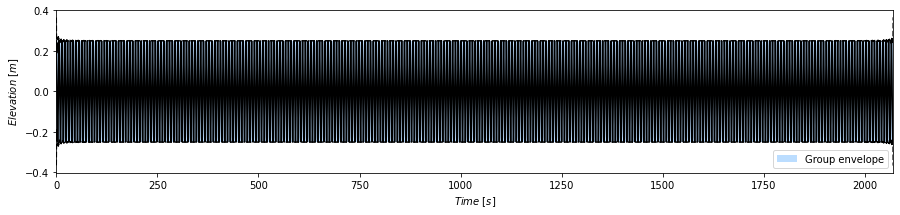

In [4]:
# define monochromatic, long-crested waves
h = 0.5  # wave height (m)
t = 7    # wave period (s)
WL = 0   # water level (m)

waves = {
    "WL": WL, 
    "H": h, 
    "T": t,
    "warmup": warmup,
    "tendc": tendc,
    "deltat": deltat,    
}

# make waves series dataset
series = series_regular_monochromatic(waves)

# plot series
sm.plot_waves(waves, series)      


### 2.2. Bichromatic waves <a name="2.2."></a>


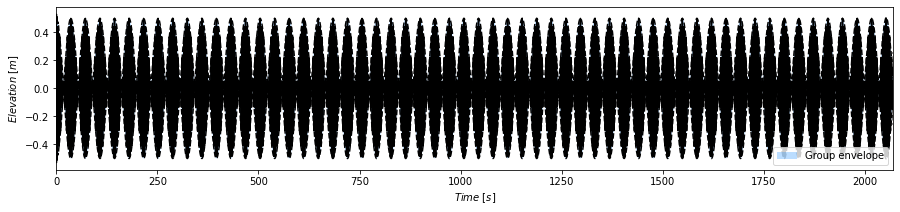

In [5]:
# define bichromatic waves
h = 0.5   # wave height (m)    
t1 = 4    # wave period of  frequency component 1
t2 = 4.5  # wave period of frequency component 2
WL = 0    # water level (m)

waves = {
    "WL": WL, 
    "H": h, 
    "T1": t1, 
    "T2": t2, 
    "warmup":  warmup,
    "tendc": tendc,
    "deltat": deltat,    
}

# make waves series dataset
series = series_regular_bichromatic(waves)

# plot series
sm.plot_waves(waves, series)   


### 2.3. JONSWAP spectrum <a name="2.3."></a>


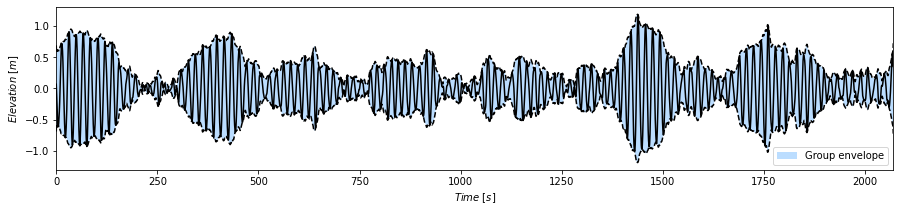

In [6]:
# define JONSWAP spectrum by means of the following spectral parameters
hs = 1.5     # significant wave height (m)
tp = 18      # peak period (s)
gamma = 100  # peak enhancement parameter of the JONSWAP spectrum
WL = 0       # water level (m)

waves = {
    "WL": WL, 
    "H": hs, 
    "T": tp, 
    "gamma": gamma, 
    "warmup": warmup,
    "tendc": tendc,
    "deltat": deltat,
}

# make waves series dataset
series = series_Jonswap(waves)

# plot series
sm.plot_waves(waves, series)      
